In [1]:
import sys
#sys.path.append('../shared/')
#import videodisko as vd
# Imports
import numpy as np
import numpy.matlib
import numpy.random

from mpl_toolkits.mplot3d import axes3d 

from matplotlib import pyplot as plt

from scipy import ndimage
from scipy import misc
from scipy import fftpack
from scipy import optimize
import scipy.io
import skimage
import imageio
import colour as c
import math
import csv

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd

import cv2
import time

from datetime import datetime

import os
from fnmatch import fnmatch

In [2]:
test01 = c.read_image("/Volumes/T7_Shield/PARK/11.1_Source_Content_Scaled/hd/20231219_HdM_HDR_2023_VideoDisco_V2_Selection/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_190419/TRANSFORMED_PQ_BT2020_FR_HD_HdM_HDR_2023_VideoDisco_LogC3_AWG3_TIFF_RGB_16_bit_190419_00000000.tif")

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


In [5]:
print(full2legal(np.min(test01)))

NameError: name 'full2legal' is not defined

# Write File Sizes

In [28]:
# HLG HD FULL
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/04.2_ARRI_Encounters_HLG_HD_NR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.2_ARRI_Encounters_HLG_HD_NR"

for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"*V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"
    pattern4 = f"*.csv*"

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3): 
                    if fnmatch(name, pattern4): 
                        comp_path = os.path.join(path,name)
                        store_path = comp_path
                        store_path = store_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG")
                        ref_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/")
                        

                        for path, subdirs, files in os.walk(ref_path):
                            for name in files:
                                if fnmatch(name, pattern1):
                                    ref_path1 = os.path.join(ref_path,name)
                                    size_in_bytes = os.path.getsize(ref_path1)
                                    print(size_in_bytes)

                                    csv_path = ref_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/")
                                    csv_name = name + "file_size.csv"
                                    csv_file_path = os.path.join(csv_path,csv_name)
                                    print(csv_file_path)

                                    with open(csv_file_path, 'w', newline='') as csv_file:
                                        writer = csv.writer(csv_file)

                                        # Write a single row with the variable
                                        writer.writerow([size_in_bytes])

363257490
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HLG_HD_NR/01_Apple_ProRes_4444/Compound Clip 97_V1-0001.movfile_size.csv
248043990
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HLG_HD_NR/02_Apple_ProRes_422_HQ/Compound Clip 97_V1-0001.movfile_size.csv
127371324
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HLG_HD_NR/03a_JPEG_2000_Profile_Level_1/Compound Clip 97_V1-0001.mxffile_size.csv
252299324
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HLG_HD_NR/03b_JPEG_2000_Profile_Level_4/Compound Clip 97_V1-0001.mxffile_size.csv
459276872
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HLG_HD_NR/05_Avid_DNxHR_444/Compound Clip 97_V1-0001.mxffile_size.csv
229900872
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HLG_HD_NR/06_Avid_DNxHR_HQX/Compound Clip 97_V1-0001.mxffile_size.csv
229900872
/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/04.2_ARRI_Encounters_HL

# Calculate File Sizes and Store with Minimum Delta E

In [91]:
# HLG HD FULL
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/02.2_ARRI_Encounters_PQ_HD_NR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/02.2_ARRI_Encounters_PQ_HD_NR"

for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"*V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"
    pattern4 = f"*.csv*"

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3): 
                    if fnmatch(name, pattern4): 
                        comp_path = os.path.join(path,name)
                        store_path = comp_path
                        store_path = store_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG")
                        ref_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/")

                        for path, subdirs, files in os.walk(ref_path):
                            for name in files:
                                if fnmatch(name, pattern1):
                                    ref_path1 = os.path.join(ref_path,name)
                                    size_in_bytes = os.path.getsize(ref_path1)
                                    print(size_in_bytes)
                                    print(ref_path1)
                                    print(comp_path)

                                    all_variables = []

                                    with open(comp_path, 'r') as csv_file:
                                        reader = csv.reader(csv_file)

                                        # Assuming a single row in the CSV file
                                        for row in reader:
                                            for value in row:
                                                try:
                                                    # Convert the value to a float and append to the array
                                                    all_variables.append(float(value.replace(',', '.')))
                                                except ValueError:
                                                    # Handle non-float values or errors during conversion
                                                    print(f"Skipping non-float value: {value}")

                                    csv_path1 = ref_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/")
                                    csv_name1 = name + "file_size_and_delta_E.csv"
                                    csv_file_path1 = os.path.join(csv_path1,csv_name1)

                                    print(type(all_variables))

                                    print(np.shape(all_variables))
                                    mean_array = mean_value = sum(all_variables) / len(all_variables)
                                    print(mean_array)

                                    with open(csv_file_path1, 'w', newline='') as csv_file:
                                        writer = csv.writer(csv_file)

                                        # Write a single row with the variable
                                        writer.writerow([size_in_bytes])
                                        writer.writerow([mean_array])


33228360
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/02.2_ARRI_Encounters_PQ_HD_NR/08_Sony_XDCAM_HD220/Compound Clip 113_V1-0001.mxf
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/02.2_ARRI_Encounters_PQ_HD_NR/08_Sony_XDCAM_HD220/Compound Clip 113_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(2073600,)
5.160226186683674
355609990
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/02.2_ARRI_Encounters_PQ_HD_NR/01_Apple_ProRes_4444/Compound Clip 113_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/02.2_ARRI_Encounters_PQ_HD_NR/01_Apple_ProRes_4444/Compound Clip 113_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(2073600,)
1.7499180274611705
229900872
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/02.2_ARRI_Encounters_PQ_HD_NR/07_Avid_DNxHD_220/Compound Clip 113_V1-0001.mxf
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/02.2_ARRI_Encounters_PQ_HD_NR/07_Avid_DNxHD_220/Compound Clip 113_V1-0001.

In [92]:
# HLG HD FULL
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.1_ARRI_Encounters_HLG_UHD_FR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.1_ARRI_Encounters_HLG_UHD_FR"

for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"*V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"
    pattern4 = f"*.csv*"

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3): 
                    if fnmatch(name, pattern4): 
                        comp_path = os.path.join(path,name)
                        store_path = comp_path
                        store_path = store_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG")
                        ref_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/")

                        for path, subdirs, files in os.walk(ref_path):
                            for name in files:
                                if fnmatch(name, pattern1):
                                    ref_path1 = os.path.join(ref_path,name)
                                    size_in_bytes = os.path.getsize(ref_path1)
                                    print(size_in_bytes)
                                    print(ref_path1)
                                    print(comp_path)

                                    all_variables = []

                                    with open(comp_path, 'r') as csv_file:
                                        reader = csv.reader(csv_file)

                                        # Assuming a single row in the CSV file
                                        for row in reader:
                                            for value in row:
                                                try:
                                                    # Convert the value to a float and append to the array
                                                    all_variables.append(float(value.replace(',', '.')))
                                                except ValueError:
                                                    # Handle non-float values or errors during conversion
                                                    print(f"Skipping non-float value: {value}")

                                    csv_path1 = ref_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/")
                                    csv_name1 = name + "file_size_and_delta_E.csv"
                                    csv_file_path1 = os.path.join(csv_path1,csv_name1)

                                    print(type(all_variables))

                                    print(np.shape(all_variables))
                                    mean_array = mean_value = sum(all_variables) / len(all_variables)
                                    print(mean_array)

                                    with open(csv_file_path1, 'w', newline='') as csv_file:
                                        writer = csv.writer(csv_file)

                                        # Write a single row with the variable
                                        writer.writerow([size_in_bytes])
                                        writer.writerow([mean_array])


1309511990
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.1_ARRI_Encounters_HLG_UHD_FR/01_Apple_ProRes_4444/Compound Clip 17_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.1_ARRI_Encounters_HLG_UHD_FR/01_Apple_ProRes_4444/Compound Clip 17_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(8294400,)
0.9540330857570472
12410274
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.1_ARRI_Encounters_HLG_UHD_FR/09_H265_Main422_10/Compound Clip 17_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.1_ARRI_Encounters_HLG_UHD_FR/09_H265_Main422_10/Compound Clip 17_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(8294400,)
1.8638207672698177
860985740
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.1_ARRI_Encounters_HLG_UHD_FR/02_Apple_ProRes_422_HQ/Compound Clip 17_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.1_ARRI_Encounters_HLG_UHD_FR/02_Apple_ProRes_422_HQ/Compound 

In [93]:
# HLG HD FULL
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.2_ARRI_Encounters_HLG_UHD_NR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.2_ARRI_Encounters_HLG_UHD_NR"

for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"*V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"
    pattern4 = f"*.csv*"

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3): 
                    if fnmatch(name, pattern4): 
                        comp_path = os.path.join(path,name)
                        store_path = comp_path
                        store_path = store_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG")
                        ref_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/")

                        for path, subdirs, files in os.walk(ref_path):
                            for name in files:
                                if fnmatch(name, pattern1):
                                    ref_path1 = os.path.join(ref_path,name)
                                    size_in_bytes = os.path.getsize(ref_path1)
                                    print(size_in_bytes)
                                    print(ref_path1)
                                    print(comp_path)

                                    all_variables = []

                                    with open(comp_path, 'r') as csv_file:
                                        reader = csv.reader(csv_file)

                                        # Assuming a single row in the CSV file
                                        for row in reader:
                                            for value in row:
                                                try:
                                                    # Convert the value to a float and append to the array
                                                    all_variables.append(float(value.replace(',', '.')))
                                                except ValueError:
                                                    # Handle non-float values or errors during conversion
                                                    print(f"Skipping non-float value: {value}")

                                    csv_path1 = ref_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/")
                                    csv_name1 = name + "file_size_and_delta_E.csv"
                                    csv_file_path1 = os.path.join(csv_path1,csv_name1)

                                    print(type(all_variables))

                                    print(np.shape(all_variables))
                                    mean_array = mean_value = sum(all_variables) / len(all_variables)
                                    print(mean_array)

                                    with open(csv_file_path1, 'w', newline='') as csv_file:
                                        writer = csv.writer(csv_file)

                                        # Write a single row with the variable
                                        writer.writerow([size_in_bytes])
                                        writer.writerow([mean_array])


1412989240
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.2_ARRI_Encounters_HLG_UHD_NR/01_Apple_ProRes_4444/Compound Clip 81_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.2_ARRI_Encounters_HLG_UHD_NR/01_Apple_ProRes_4444/Compound Clip 81_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(8294400,)
0.8575994942310758
880835740
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.2_ARRI_Encounters_HLG_UHD_NR/02_Apple_ProRes_422_HQ/Compound Clip 81_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.2_ARRI_Encounters_HLG_UHD_NR/02_Apple_ProRes_422_HQ/Compound Clip 81_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(8294400,)
1.6584726320169132
127371324
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/03.2_ARRI_Encounters_HLG_UHD_NR/03a_JPEG_2000_Profile_Level_1/Compound Clip 81_V1-0001.mxf
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/03.2_ARRI_Encounters_HLG_UHD_NR/03a_JPEG_2000_Pr

In [94]:
# HLG HD FULL
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/04.1_ARRI_Encounters_HLG_HD_FR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.1_ARRI_Encounters_HLG_HD_FR"

for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"*V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"
    pattern4 = f"*.csv*"

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3): 
                    if fnmatch(name, pattern4): 
                        comp_path = os.path.join(path,name)
                        store_path = comp_path
                        store_path = store_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG")
                        ref_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/")

                        for path, subdirs, files in os.walk(ref_path):
                            for name in files:
                                if fnmatch(name, pattern1):
                                    ref_path1 = os.path.join(ref_path,name)
                                    size_in_bytes = os.path.getsize(ref_path1)
                                    print(size_in_bytes)
                                    print(ref_path1)
                                    print(comp_path)

                                    all_variables = []

                                    with open(comp_path, 'r') as csv_file:
                                        reader = csv.reader(csv_file)

                                        # Assuming a single row in the CSV file
                                        for row in reader:
                                            for value in row:
                                                try:
                                                    # Convert the value to a float and append to the array
                                                    all_variables.append(float(value.replace(',', '.')))
                                                except ValueError:
                                                    # Handle non-float values or errors during conversion
                                                    print(f"Skipping non-float value: {value}")

                                    csv_path1 = ref_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/")
                                    csv_name1 = name + "file_size_and_delta_E.csv"
                                    csv_file_path1 = os.path.join(csv_path1,csv_name1)

                                    print(type(all_variables))

                                    print(np.shape(all_variables))
                                    mean_array = mean_value = sum(all_variables) / len(all_variables)
                                    print(mean_array)

                                    with open(csv_file_path1, 'w', newline='') as csv_file:
                                        writer = csv.writer(csv_file)

                                        # Write a single row with the variable
                                        writer.writerow([size_in_bytes])
                                        writer.writerow([mean_array])


355697990
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.1_ARRI_Encounters_HLG_HD_FR/01_Apple_ProRes_4444/Compound Clip 49_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/04.1_ARRI_Encounters_HLG_HD_FR/01_Apple_ProRes_4444/Compound Clip 49_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(2073600,)
1.6254304970322573
4294607
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.1_ARRI_Encounters_HLG_HD_FR/09_H265_Main422_10/Compound Clip 49_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/04.1_ARRI_Encounters_HLG_HD_FR/09_H265_Main422_10/Compound Clip 49_V1-0001.000200.tif_Analysis_MSE_PSNR_SSIM_JND.tif_delta_E_map.csv
<class 'list'>
(2073600,)
2.6602761662420376
247274990
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.1_ARRI_Encounters_HLG_HD_FR/02_Apple_ProRes_422_HQ/Compound Clip 49_V1-0001.mov
/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG/04.1_ARRI_Encounters_HLG_HD_FR/02_Apple_ProRes_422_HQ/Compound Clip 49_

In [15]:
# HLG HD FULL
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/04.2_ARRI_Encounters_HLG_HD_NR'
#ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/01.1_ARRI_Encounters_PQ_UHD_FR"

for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"*V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"
    pattern4 = f"*JOD.csv"

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3): 
                    if fnmatch(name, pattern4): 
                        comp_path = os.path.join(path,name)
                        print("Hier noch richtig:" + comp_path)
                        store_path = comp_path
                        store_path = store_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61_AUSWERTUNG")
                        ref_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/")
                        print("Äußere Schleifer fertig")

                        for path, subdirs, files in os.walk(ref_path):
                            for name in files:
                                if fnmatch(name, pattern1):
                                    comp_path = comp_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/")
                                    ref_path1 = os.path.join(ref_path,name)
                                    print("DAs ist REf:" + ref_path1)
                                    size_in_bytes = os.path.getsize(ref_path1)
                                    print(size_in_bytes)
                                    print(ref_path1)
                                    print("Comp Path" + comp_path)

                                    all_variables = []

                                    # Open the CSV file
                                    with open(comp_path, 'r') as file_csv:
                                        # Create a CSV reader object
                                        csv_reader = csv.reader(file_csv)
                                        
                                        # Iterate over the rows in the CSV file
                                        for row in csv_reader:
                                            # Assuming the first column contains numbers, you can convert it to a float
                                            first_number = float(row[0])
                                            print("First number in the CSV file:", first_number)
                                            
                                            # Break after reading the first row if you only need the first number
                                            break

                                    csv_path1 = ref_path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/","/Volumes/jm_HDD/jm_MA_V1/CONTENT/82.1_Files_Sizes_and_P_Det/")
                                    print
                                    csv_name1 = name + "file_size_and_P_det.csv"
                                    csv_file_path1 = os.path.join(csv_path1,csv_name1)
                                    print(csv_file_path1)


                                    with open(csv_file_path1, 'w', newline='') as csv_file:
                                        writer = csv.writer(csv_file)

                                        # Write a single row with the variable
                                        writer.writerow([size_in_bytes])
                                        writer.writerow([first_number])

                                    print("Innere Schleifer fertig")
                            
                            print("Innere fertig vor neuem durchlauf")


Hier noch richtig:/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/04.2_ARRI_Encounters_HLG_HD_NR/01_Apple_ProRes_4444/Compound Clip 97_V1-0001.000200.tif_HDR_VDP_3_0_MATLAB.tif_Q_Q_JOD.csv
Äußere Schleifer fertig
DAs ist REf:/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.2_ARRI_Encounters_HLG_HD_NR/01_Apple_ProRes_4444/Compound Clip 97_V1-0001.mov
363257490
/Volumes/jm_HDD/jm_MA_V1/CONTENT/31_TRANSCODING_TIFF/04.2_ARRI_Encounters_HLG_HD_NR/01_Apple_ProRes_4444/Compound Clip 97_V1-0001.mov
Comp Path/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/04.2_ARRI_Encounters_HLG_HD_NR/01_Apple_ProRes_4444/Compound Clip 97_V1-0001.000200.tif_HDR_VDP_3_0_MATLAB.tif_Q_Q_JOD.csv
First number in the CSV file: 0.02493519
/Volumes/jm_HDD/jm_MA_V1/CONTENT/82.1_Files_Sizes_and_P_Det/04.2_ARRI_Encounters_HLG_HD_NR/01_Apple_ProRes_4444/Compound Clip 97_V1-0001.movfile_size_and_P_det.csv
Innere Schleifer fertig
Innere fertig vor neuem durchlauf
Hier noch richtig:/Volumes/jm_HDD/jm_M

In [ ]:
import csv

# Specify the path to your CSV file
csv_file_path = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/01.1_ARRI_Encounters_PQ_UHD_FR/01_Apple_ProRes_4444/Compound Clip 1_V1-0001.000200.tif_HDR_VDP_3_0_MATLAB.tif_Q_Q_JOD.csv'

# Open the CSV file
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    
    # Iterate over the rows in the CSV file
    for row in csv_reader:
        # Assuming the first column contains numbers, you can convert it to a float
        first_number = float(row[0])
        print("First number in the CSV file:", first_number)
        
        # Break after reading the first row if you only need the first number
        break


First number in the CSV file: 0.004447993


# Calculate Means from all Clips

In [ ]:
import os
import pandas as pd

def calculate_mean_values(folder_path):
    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

    if not csv_files:
        print(f"No CSV files found in {folder_path}.")
        return

    # Initialize lists to store values from the first and second rows
    first_row_values = []
    second_row_values = []

    # Iterate through each CSV file in the folder
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, header=None)

        # Extract values from the first and second rows
        first_row_values.append(df.iloc[0, :].values)
        second_row_values.append(df.iloc[1, :].values)

    # Calculate mean values for the first and second rows
    mean_first_row = pd.DataFrame(first_row_values).mean(axis=0)
    mean_second_row = pd.DataFrame(second_row_values).mean(axis=0)

    return mean_first_row, mean_second_row

def save_means_to_csv(folder_path, mean_first_row, mean_second_row):
    # Create a DataFrame with mean values
    mean_df = pd.DataFrame({'Mean_First_Row': mean_first_row, 'Mean_Second_Row': mean_second_row})

    # Create a new CSV file with mean values in the folder
    output_csv_path = os.path.join(folder_path, 'means_output.csv')
    mean_df.to_csv(output_csv_path, index=False)

# Replace 'your_top_folder_path' with the path to the top-level folder
your_top_folder_path = 'your_top_folder_path'

# Iterate through each folder in the top-level folder
for root, dirs, files in os.walk(your_top_folder_path):
    # Check if there are CSV files in the current folder
    csv_files = [file for file in files if file.endswith(".csv")]
    
    if csv_files:
        current_folder_path = os.path.abspath(root)
        
        # Calculate mean values for the current folder
        mean_first_row, mean_second_row = calculate_mean_values(current_folder_path)
        
        # Save mean values to CSV in the current folder
        save_means_to_csv(current_folder_path, mean_first_row, mean_second_row)

print("Mean values calculated and saved for each folder.")

In [ ]:
import os
import pandas as pd

def calculate_means(folder_path):
    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Initialize dictionaries to store mean values
    mean_dict_row1 = {}
    mean_dict_row2 = {}

    # Loop through each CSV file in the folder
    for csv_file in csv_files:
        csv_path = os.path.join(folder_path, csv_file)

        # Read CSV file into a DataFrame
        df = pd.read_csv(csv_path, header=None)

        # Calculate mean for the first and second row
        mean_row1 = df.iloc[0].mean()
        mean_row2 = df.iloc[1].mean()

        # Store mean values in dictionaries
        mean_dict_row1[csv_file] = mean_row1
        mean_dict_row2[csv_file] = mean_row2

    # Create a DataFrame for mean values
    result_df = pd.DataFrame({'Mean_Row1': mean_dict_row1.values(), 'Mean_Row2': mean_dict_row2.values()})

    # Write the result DataFrame to a new CSV file with folder name
    result_csv_path = os.path.join(folder_path, f'{os.path.basename(folder_path)}.csv')
    result_df.to_csv(result_csv_path, index=False)

# Specify the root folder containing subfolders
root_folder = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/01.1_ARRI_Encounters_PQ_UHD_FR'

# Loop through each subfolder and calculate means
for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        calculate_means(subfolder_path)


TypeError: Could not convert Overall_Mean_Row1Overall_Mean_Row2 to numeric

### Calculate Medians

In [27]:
import os
import pandas as pd

def calculate_means(folder_path):
    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.csv') ]

    # Initialize lists to store mean values
    mean_values_row1 = []
    mean_values_row2 = []

    # Loop through each CSV file in the folder
    for csv_file in csv_files:
        csv_path = os.path.join(folder_path, csv_file)

        # Read CSV file into a DataFrame
        df = pd.read_csv(csv_path, header=None)

        # Convert values to numeric (handle non-numeric values)
        df = df.apply(pd.to_numeric, errors='coerce')

        # Calculate mean for the first and second row
        mean_row1 = df.iloc[0].mean()
        row2_values_below_50 = df.iloc[1][df.iloc[1] < 0.98]
        mean_row2 = row2_values_below_50.mean()

        # Append mean values to lists
        mean_values_row1.append(mean_row1)
        mean_values_row2.append(mean_row2)

        mean_values_row2 = list(filter(lambda v: v==v, mean_values_row2))

    # Calculate mean for every column
    print(np.shape(mean_values_row1))
    print(mean_values_row2)
    
    overall_mean_row1 = np.mean(mean_values_row1)
    overall_mean_row2 = np.mean(mean_values_row2)
    print(mean_values_row1) 


    # Create a DataFrame for mean values
    result_df = pd.DataFrame({'Overall_Mean_Row1': overall_mean_row1, 'Overall_Mean_Row2': overall_mean_row2}, index=[0])

    # Write the result DataFrame to a new CSV file with folder name
    result_csv_path = os.path.join(folder_path, f'{os.path.basename(folder_path)}.csv')
    result_df.to_csv(result_csv_path, index=False)

# Specify the root folder containing subfolders
root_folder = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/82.1_Files_Sizes_and_P_Det/04.2_ARRI_Encounters_HLG_HD_NR'

# Loop through each subfolder and calculate means
for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        calculate_means(subfolder_path)


(17,)
[0.02493519, 0.114362, 0.003972993, 0.02759006, 0.006058013, 0.01131591, 0.008905125, 0.09874793, 0.005855026, 0.004723537, 0.008334597, 0.004431359, 0.02767412, 0.05995302, 0.105955, 0.06363125, 0.02642486]
[363257490.0, 355232740.0, 377558240.0, 367746740.0, 344245240.0, 360188240.0, 316372240.0, 359560240.0, 355591240.0, 352365740.0, 365617490.0, 344545740.0, 349089240.0, 374538990.0, 363314240.0, 359125240.0, 358916990.0]
(17,)
[0.03741727, 0.2310127, 0.01360522, 0.04050259, 0.006933626, 0.02241144, 0.009120957, 0.1287545, 0.006620876, 0.01537253, 0.01798937, 0.01300091, 0.02711087, 0.1610284, 0.2023336, 0.09458075, 0.0430963]
[248043990.0, 247837490.0, 232412740.0, 249257990.0, 245338990.0, 233451990.0, 229159990.0, 249464240.0, 253194490.0, 230365490.0, 234975990.0, 217123240.0, 243858740.0, 250916490.0, 234619990.0, 246503240.0, 237358240.0]
(17,)
[0.3616488, 0.5092259, 0.2951532, 0.6245666, 0.2158499, 0.2083096, 0.1477889, 0.6168503, 0.2367805, 0.5076985, 0.3746901, 0.145

/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/2335045026.py:25: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(csv_path, header=None, error_bad_lines=False)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/2335045026.py:25: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(csv_path, header=None, error_bad_lines=False)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/2335045026.py:25: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(csv_path, header=None, error_bad_lines=False)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/2335045026.py:25: FutureWarning: The error_bad_lines argument has been dep

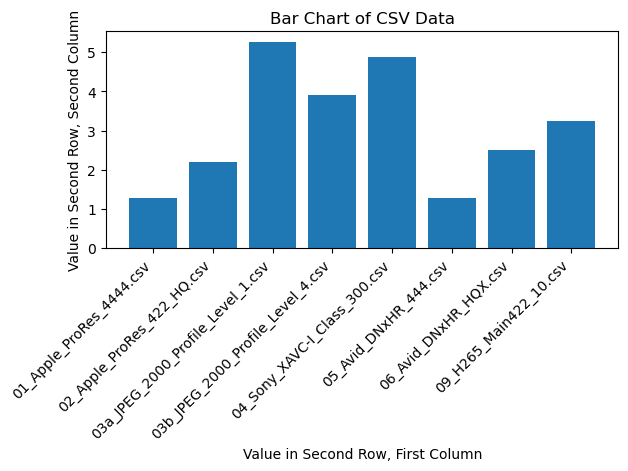

In [ ]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

def extract_first_two_digits(file_name):
    # Extract the first two digits from the file name using regular expression
    match = re.match(r'^(\d{2})', file_name)
    if match:
        return int(match.group(1))
    else:
        return 0  # Default value if no match is found

def plot_csv_data(root_directory):
    # Initialize lists to store data for plotting
    data = []

    # Walk through all directories and subdirectories
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for csv_file in filenames:
            if csv_file.endswith('.csv') and csv_file[:2].isdigit():
                csv_path = os.path.join(dirpath, csv_file)

                # Read CSV file into a DataFrame, converting non-numeric values to NaN
                df = pd.read_csv(csv_path, header=None, error_bad_lines=False)

                # Extract values from the second row and first and second columns
                x_value = df.iloc[1, 0]
                y_value = df.iloc[1, 1]

                # Append values to the list
                data.append({'File': csv_file, 'X_Value': x_value, 'Y_Value': y_value})

    # Create a DataFrame from the collected data
    df_data = pd.DataFrame(data)

    # Extract the first two digits from the 'File' column and use it for sorting
    df_data['Sort_Key'] = df_data['File'].apply(extract_first_two_digits)
    df_data = df_data.sort_values(by='Sort_Key')

    # Convert y-axis values to float with four digits after handling non-numeric values
    df_data['Y_Value'] = pd.to_numeric(df_data['Y_Value'], errors='coerce').round(4)

    # Create a bar chart with linear y-axis
    plt.bar(df_data['X_Value'], df_data['Y_Value'], align='center')
    plt.xlabel('Value in Second Row, First Column')
    plt.ylabel('Value in Second Row, Second Column')
    plt.title('Bar Chart of CSV Data')
    plt.xticks(df_data['X_Value'], df_data['File'], rotation=45, ha='right')  # Use file names as markers on x-axis

    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

# Specify the root directory containing subdirectories with CSV files
root_directory = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/04.1_ARRI_Encounters_HLG_HD_FR'

# Call the function to plot CSV data
plot_csv_data(root_directory)


/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/3054087076.py:19: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(csv_path, header=None, error_bad_lines=False)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/3054087076.py:19: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(csv_path, header=None, error_bad_lines=False)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/3054087076.py:19: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(csv_path, header=None, error_bad_lines=False)
/var/folders/5g/lmsxmd_122x8g7pj5_379g5w0000gn/T/ipykernel_10013/3054087076.py:19: FutureWarning: The error_bad_lines argument has been dep

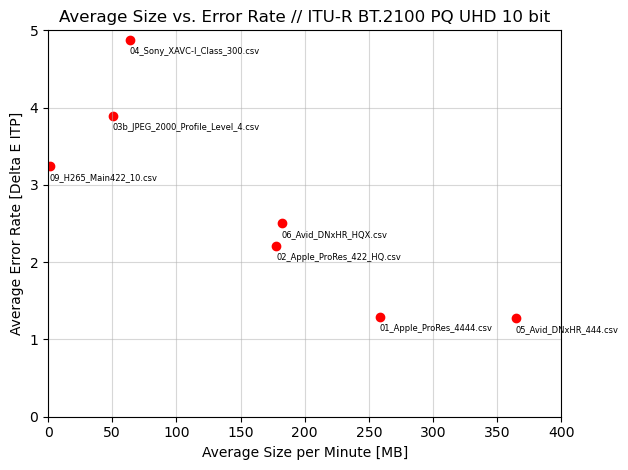

In [ ]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

def plot_csv_data(root_directory):
    # Initialize lists to store data for plotting
    x_values = []
    y_values = []
    file_names = []

    # Walk through all directories and subdirectories
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for csv_file in filenames:
            if csv_file.endswith('.csv') and csv_file[:2].isdigit():
                csv_path = os.path.join(dirpath, csv_file)

                # Read CSV file into a DataFrame, converting non-numeric values to NaN
                df = pd.read_csv(csv_path, header=None, error_bad_lines=False)

                # Extract values from the second row and first and second columns
                x_value = df.iloc[1, 0]
                y_value = df.iloc[1, 1]

                # Append values to the lists
                x_values.append(x_value)
                y_values.append(y_value)
                file_names.append(csv_file)

    # Convert x-axis values to float, divide by 5, and round to 4 digits
    x_values = (pd.to_numeric(x_values, errors='coerce') / 5 / 1000 / 1000).round(4)

    # Convert y-axis values to float with four digits after handling non-numeric values
    y_values = pd.to_numeric(y_values, errors='coerce').round(4)

    # Create a scatter plot
    

    
    plt.grid(True,alpha=0.5)
    plt.xlabel('Average Size per Minute [MB]')
    plt.ylabel('Average Error Rate [Delta E ITP]')
    plt.title('Average Size vs. Error Rate // ITU-R BT.2100 PQ UHD 10 bit')
    plt.xlim(0,400)
    plt.ylim(0,5)
    plt.scatter(x_values, y_values,color="red")

    # Annotate each point with the corresponding file name
    for i, file_name in enumerate(file_names):
        plt.annotate(file_name, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, -10), ha='left', rotation=0,fontsize=6)


    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

# Specify the root directory containing subdirectories with CSV files
root_directory = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/82_File_Sizes_and_Delta_E/01.2_ARRI_Encounters_PQ_UHD_NR'

# Call the function to plot CSV data
plot_csv_data(root_directory)

In [ ]:
import os
import csv
import numpy as np

def read_csv(file_path):
    with open(file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        data = list(reader)
    return float(data[0][0])  # Assuming the value is a float

def process_directories(directory1, directory2):
    for root, dirs, files in os.walk(directory1):
        for file in files:
            if file.endswith(".csv"):
                file_path1 = os.path.join(root, file)
                v1_number = file.split('-')[1]  # Extracting the V1-XXXX pattern
                print(v1_number)

                # Construct the corresponding file path in the second directory
                file_path2 = os.path.join(directory2, root[len(directory1)+1:], file)

                # Ensure that the file in the second directory ends with "JND.csv"
                file_path2 = os.path.splitext(file_path2)[0] + "JOD.csv"

                if os.path.exists(file_path2):
                    value1 = read_csv(file_path1)
                    value2 = read_csv(file_path2)

                    # Process values and calculate mean
                    values_array1 = [value1]
                    values_array2 = [value2]

                    print(values_array1)

                    # Save mean values to a new CSV file
                    folder_name = os.path.basename(root)
                    output_file_path = os.path.join(directory1, folder_name + "_means.csv")

                    with open(output_file_path, 'w', newline='') as output_file:
                        writer = csv.writer(output_file)
                        writer.writerow(["Mean1", "Mean2"])
                        writer.writerow([np.mean(values_array1), np.mean(values_array2)])

# Example usage:
directory1 = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/81_File_Sizes/01.1_ARRI_Encounters_PQ_UHD_FR"
directory2 = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.1_AUSWERTUNG_MATLAB/01.1_ARRI_Encounters_PQ_UHD_FR"

process_directories(directory1, directory2)


0001.movfile_size.csv
0002.movfile_size.csv
0003.movfile_size.csv
0004.movfile_size.csv
0005.movfile_size.csv
0006.movfile_size.csv
0007.movfile_size.csv
0008.movfile_size.csv
0009.movfile_size.csv
0010.movfile_size.csv
0011.movfile_size.csv
0012.movfile_size.csv
0013.movfile_size.csv
0014.movfile_size.csv
0015.movfile_size.csv
0016.movfile_size.csv
0017.movfile_size.csv
0001.mxffile_size.csv
0002.mxffile_size.csv
0003.mxffile_size.csv
0004.mxffile_size.csv
0005.mxffile_size.csv
0006.mxffile_size.csv
0007.mxffile_size.csv
0008.mxffile_size.csv
0009.mxffile_size.csv
0010.mxffile_size.csv
0011.mxffile_size.csv
0012.mxffile_size.csv
0013.mxffile_size.csv
0014.mxffile_size.csv
0015.mxffile_size.csv
0016.mxffile_size.csv
0017.mxffile_size.csv
0001.mxffile_size.csv
0002.mxffile_size.csv
0003.mxffile_size.csv
0004.mxffile_size.csv
0005.mxffile_size.csv
0006.mxffile_size.csv
0007.mxffile_size.csv
0008.mxffile_size.csv
0009.mxffile_size.csv
0010.mxffile_size.csv
0011.mxffile_size.csv
0012.mxffi